In [1]:
import numpy as np


In [2]:
from scipy import sparse
from scipy.sparse.linalg import dsolve

In [3]:
import matplotlib.cm as cm
from matplotlib import pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

In [4]:
J=4

In [5]:
h = 1.0/(J+1)

# Building Ah

We first build (h**2)*Ah

The diagonal of (h**2)*Ah is exactly the diagonal of matrices T, which is composed of 4.

In [6]:
diagonal_T = np.ones(J**2)*4.0

Immediately above and below the diagonal we have -1.
There are only J**2-1 elements above and below the diagonal of Ah.
There are only J-1 elements on above and below the diagonal of T,
for this reason we cancel out the element every J times

In [7]:
side_diagonal_T = np.ones(J**2-1)*(-1.0)
side_diagonal_T[np.arange(1,J**2)%J==0] = 0

When we go J diagonals above or below the diagonals, we have J**2-J elements
We will have the element -1.
Let us build the identity matrices.

In [8]:
diagonal_I = np.ones(J**2-J)

In [9]:
h2_Ah = sparse.diags([-diagonal_I,
                      side_diagonal_T,
                      diagonal_T,
                      side_diagonal_T,
                      -diagonal_I],
                     [-J,-1,0, 1,J], format="csr")

We divide by h**2 to obtain Ah

In [10]:
Ah = h2_Ah*(1/(h**2))

# Building b

In [11]:
b = np.ones(J**2)

# Computing the solution u 

In [12]:
u = dsolve.spsolve(Ah, b)

# Plotting the solution u 

u is a vector of R^(J**2)
we build a matrix in M_(J+2,J+2)
The first and last lines are 0, the first and last column are 0 (Dirichlet)
The rest of the matrix is built with the elements of u

In [13]:
z = np.empty([J+2, J+2])

for i in range(0,J+2):
  for j in range(0,J+2):

    n = j+J*(i-1)   # Going from two indices to one
    
    if i==0 or i==J+1:
        z[i,j] = 0.0
    if j==0 or j==J+1:
        z[i,j] = 0.0
    if i>0 and j>0 and i<J+1 and j<J+1:
        z[i, j] = u[n-1]    # elements of u are numbered starting at 0

First way to plot the data: we show the values using colors

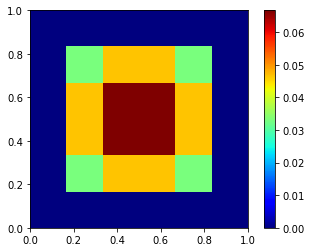

In [14]:
plt.imshow(z, cmap=cm.jet, extent=[0.0, 1.0, 0.0, 1.0])
plt.colorbar()

Second way to plot the data: we create a 3D-plot

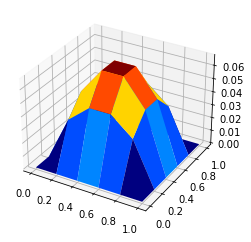

In [15]:
fig = plt.figure()
ax = fig.gca(projection='3d')
x = np.linspace(0.0, 1.0, num=J+2)
y = np.linspace(0.0, 1.0, num=J+2)
X, Y = np.meshgrid(x, y)
surf = ax.plot_surface(X, Y, z, linewidth=0, cmap=cm.jet)